# Project: Investigate a Dataset (Movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This Project will be focused on investigating The Movie Database (TMDb) which contains various information about movies such as their genres, runtime, budget etc. We will be investigating the following key questions:

1) Which genres typically had a higher voting average?<br>
2) Which production companies had the highest spending budgets? How does their revenue compare to the overall database?<br>
3) What is the relationship between the movie budgets and their yielded **profits**?<br>
4) Which genres have been the most popular over the years?<br>
5) How much has the movie industry grown over the years? Are the runtimes generally increasing or decreasing with time?


### Import Libraries
First, we begin by importing all neccessary libraries to complete the project which include: *Pandas*, *NumPy*, *Seaborn*, *Matplotlib* and we later import the *csv file* and assign it to a dataframe **df**




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

Now that the csv file has been imported, we can now begin exploring the data in order to fine tune it for our analysis practice.

### General Properties

The first glance at the first five rows of the entire dataset

In [2]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


With "info", we are able to examine the dataset types associated with each column and the total number of non-null values per column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

With "describe", we are able to further examine basic statistics of the dataset such as the minimum, maximum values and standard deviations.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In this part, we will be fine-tuning the existing dataset in the following ways:

1) Deleting columns which are not neccessary for the project exercise.<br>
2) Dropping any duplicated rows.<br>
3) Tweaking odd values shown in the columns under study.

1) Start with deleting all unneccessary columns which will not be used for our analysis



In [5]:
df.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

Confirm results >>>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 933.9+ KB


2) Drop rows which are repeated for all columns

In [7]:
sum(df.duplicated())
df.drop_duplicates(inplace = True)

Confirm results >>>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 1018.6+ KB


3) Tweaking the values

While using the describe feature during the wrangling process, it was noticed that some of the values under study were showing odd values. For example, the budget, revenue and runtime columns had a **min** value of 0 which is an unusual occurence. Hence, next exercise will be to tweak those values either by ommitting the entire rows from the dataset or by converting them to null values whichever is more suitable.

**Check 1:** We will first need to locate the rows which are showing a <u>*budget*</u> equivalent to 0. We filter to show the first row alone.

In [9]:
df_check = df.loc[(df[['budget']] == 0).all(axis=1)]

df_check.head(1)

,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
30,0,29355203,Mr. Holmes,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,425,6.4,2015


According to the above, the movie **Mr.Holmes** is showing a budget of 0; however, as per IMDB it had an estimated budget of $10,000,000. Thus, making this value unreliable.<br><br>

**Check 2:** Next we will repeat the same exercise with <u>*revenue*</u>. Instead of showing the first row, we can show the last row by replacing *head* with *tail*.

In [10]:
df_check2 = df.loc[(df[['revenue']] == 0).all(axis=1)]

df_check2.tail(1)

,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
10865,19000,0,Manos: The Hands of Fate,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74,Horror,Norm-Iris,15,1.5,1966


According to above, the movie **Manor: The Hands of Fate** is showing a revenue of zero; however, as per IMDB it had a US Gross of $26,285,544. Thus, making this value unreliable.<br><br>

**Check 3:** Next we will repeat the same exercise with <u>*Runtime*</u>. 


In [11]:
df_check3 = df.loc[(df[['runtime']] == 0).all(axis=1)]

df_check3.head(1)

,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
92,0,0,Mythica: The Necromancer,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015


According to above, the movie **Mythica: The Necromancer** is showing a runtime of 0 minutes; whereas, on IMDB the movie has a runtime of 1 hr 33mins. Thus, making this value unreliable.<br><br>

Based on the results above, we notice that the values displayed under these columns are incorrect and should not be considered. It is best to replace zero values with null values in order to maintain record of remaining columns which may come to use to analyze remaining data in other questions such as genres, keywords, etc.

In [12]:
cols = ["budget", "revenue", "runtime"]
df[cols] = df[cols].replace({0:np.nan, 0:np.nan})
df.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year
count,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000
mean,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859
std,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260
min,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000
50%,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000
75%,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Confirm results >>>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(4), int64(2), object(5)
memory usage: 1018.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have a clean dataset, we are able to move on further with investigating the dataset. We will first begin with identifying a relationship between the genres and the movie voting average. This way, we will be able to further understand which genres usually yield the higher ratings.


### Research Question 1 - Which genres typically had a higher voting average?

First we should check the number of unique genres

In [14]:
df.genres.nunique()

2039

Due to genres column containing multiple values separated by pipe (|), there are way too many unique points. To resolve this, we will need to segregate the values under genre by splitting them from the pipes and creating a new unique row for each genre.

In [15]:
genres_split = df['genres'].str.split('|').apply(pd.Series, 1).stack()
genres_split.index = genres_split.index.droplevel(-1)
genres_split.name = 'genres'

del df['genres']

df_genres = df.join(genres_split)

df_genres.head()

,budget,revenue,original_title,director,keywords,runtime,production_companies,vote_count,vote_average,release_year,genres
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Action
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Adventure
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Science Fiction
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Thriller
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,Action


Let us check the number of unique genres now after the split.

In [16]:
df_genres.genres.nunique()

20

Now we have a more realistic number of genres of 20. Let us check the sum of vote counts per genre now.

In [17]:
vc_sum = df_genres.groupby(['genres']).sum().vote_count

vc_sum

genres
Action             936897
Adventure          754807
Animation          211797
Comedy             669223
Crime              377502
Documentary         18255
Drama              868912
Family             335227
Fantasy            385399
Foreign              3126
History             61380
Horror             196538
Music               50731
Mystery            191969
Romance            284313
Science Fiction    537191
TV Movie             5739
Thriller           742693
War                 73098
Western             33947
Name: vote_count, dtype: int64

We can now check the average number of votes across each genre

In [18]:
df_genres.groupby(['genres']).mean()

,budget,revenue,runtime,vote_count,vote_average,release_year
genres,,,,,,
Action,4.629070e+07,1.377323e+08,105.005877,392.993708,5.787752,2000.056208
Adventure,6.095670e+07,1.974209e+08,106.245578,513.125085,5.940585,1999.388851
Animation,6.226418e+07,2.219578e+08,68.181688,303.000000,6.403147,2003.995708
Comedy,2.898793e+07,8.037100e+07,97.026441,176.436330,5.905167,2000.816240
Crime,2.906049e+07,7.421367e+07,106.996305,278.805022,6.124889,1999.491137
Documentary,4.689337e+06,1.040564e+07,103.247582,35.105769,6.908462,2008.313462
Drama,2.441806e+07,6.118977e+07,110.687434,182.544538,6.165546,2000.929202
Family,5.498154e+07,1.738114e+08,89.749390,272.320877,5.997563,2000.774167
Fantasy,5.880537e+07,1.913738e+08,100.846995,420.741266,5.863537,2000.292576


Above information is **not very reliable** as it considers an equal weight for the vote average per movie although there are different number of votes distributed for each movie. Hence, it is best to calculate the sum of the product of the vote counts and vote average and divide it by the total number of votes per genre for a fair measure as per below equation:<br>

\begin{equation*}
average\_vote = \frac{\sum_{k=1}^n vote\_average * vote\_count }{sum\_of\_votes}
\end{equation*}<br>


Let us begin by adding a new column for product of vote_count and vote_average.

In [19]:
df_genres['vote_product'] = df_genres['vote_count']*df_genres['vote_average']

Next we divide the sum of products by the total number of votes.

In [20]:
sum_of_products = df_genres.groupby(['genres']).sum().vote_product

sum_of_votes = df_genres.groupby(['genres']).sum().vote_count

average_vote = sum_of_products / sum_of_votes

average_vote.sort_index()

genres
Action             6.547704
Adventure          6.632753
Animation          6.819854
Comedy             6.392141
Crime              6.745160
Documentary        7.072342
Drama              6.841128
Family             6.648997
Fantasy            6.551695
Foreign            6.101088
History            6.993177
Horror             6.041762
Music              6.697110
Mystery            6.663521
Romance            6.526093
Science Fiction    6.613657
TV Movie           5.731608
Thriller           6.521153
War                7.021921
Western            6.797800
dtype: float64

Now that we have a proper average for each genre, we can proceed with producing a visual representation to show the distribution of voting average across different genres. 

For a clearer pattern, we will sort values shown above from largest to smallest.

Text(0,0.5,'Genres')

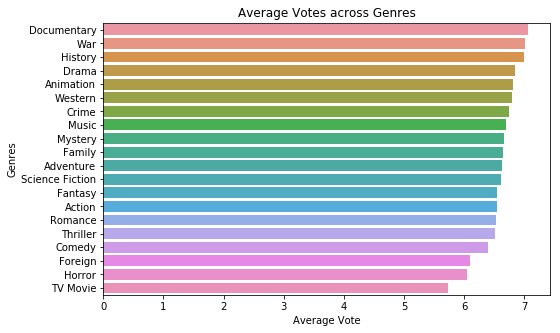

In [21]:
df_genre_vote = pd.DataFrame({'genres': average_vote.index, 'average_vote': average_vote.values})
df_genre_vote

df_genre_vote = df_genre_vote.sort_values(by='average_vote', ascending=False)

df_genre_vote 

f, ax = plt.subplots(figsize = (8, 5))
sns.barplot(x = 'average_vote', y = 'genres', data = df_genre_vote)
ax.set_title('Average Votes across Genres')
ax.set_xlabel('Average Vote')
ax.set_ylabel('Genres')

According to the above barplot, documentary, war and history genres have the highest average votes. However, let us examine the number of votes for these genres with respect to the total number of votes for all genres.<br>

To do this, we will need to calculate the percentage of the vote counts per genre as per the following equation: 

\begin{equation*}
ratio\_perc = \frac{100 * vc\_sum}{vc\_sum\_total}
\end{equation*}<br>

Once the results are produced, we can plot it on a pie chart to show the relative number of votes per genres.

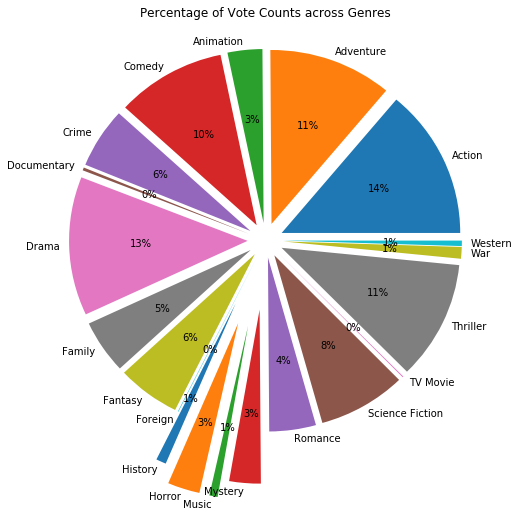

In [22]:
ratio = vc_sum / vc_sum.sum()

ratio_perc = ratio*100

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.4,0.5,0.5,0.4,0.1,0.1,0.1,0.1,0.1,0.1)

ratio_perc

ratio_perc = ratio_perc.plot.pie(y='ratio_perc', explode = explode, fontsize=10, figsize=(8, 8), autopct='%1.0f%%', labeldistance=1.05);
plt.title("Percentage of Vote Counts across Genres");
ratio_perc.set_ylabel('');

According to the pie chart, the documentary, war and history genres comprise a very small part of the total number of votes deeming the ratings unreliable. Instead, we ought to consider genres with a relatively high number of vote counts such as action and drama.<br>

From the previous barplot we notice that the drama genre comes after documentary, war and history. However, since it has a reliable number of vote counts, we can consider that drama has the highest movie ratings relative to the popular vote count.

### Research Question 2  - Which production companies have the highest spending budgets? How does their revenue compare to the overall database?

Similar to the genres criteria, the production companies also have multiple values listed under the same cell separated by pipe (|); hence, the first exercise will be to split the cells to individual unique values.

In [23]:
prod_comp_split = df['production_companies'].str.split('|').apply(pd.Series, 1).stack()
prod_comp_split.index = prod_comp_split.index.droplevel(-1)
prod_comp_split.name = 'production_companies'

del df['production_companies']

df_prod_comp = df.join(prod_comp_split)

Confirm results >>>

In [24]:
df_prod_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24255 entries, 0 to 10865
Data columns (total 10 columns):
budget                  13597 non-null float64
revenue                 12774 non-null float64
original_title          24255 non-null object
director                24208 non-null object
keywords                21517 non-null object
runtime                 24214 non-null float64
vote_count              24255 non-null int64
vote_average            24255 non-null float64
release_year            24255 non-null int64
production_companies    23225 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 2.0+ MB


In [25]:
df_prod_comp.nunique().production_companies

7879

After splitting the production companies, we find out that there is a total of 4448 unique production companies in this dataset.

Now we need to calculate the overall budget spent per production company then divide it over the cumulative budget for all movies in order to calculate the ratio of budget spent per production company to the overall budget.

Below equation will be used:


\begin{equation*}
comp\_budget\_ratio\_perc = \frac{comp\_overall\_budget * 100 }{overall\_budget}
\end{equation*}<br>

We will then filter the results to obtain the top 3 spending production companies.

In [26]:
comp_overall_budget = df_prod_comp.groupby(['production_companies']).sum().budget

overall_budget = df_prod_comp.groupby(['production_companies']).sum().budget.sum()

comp_budget_ratio_perc = comp_overall_budget * 100 / overall_budget

top_3_budget_comp = comp_budget_ratio_perc.nlargest(3)

top_3_budget_comp


production_companies
Warner Bros.          4.142673
Universal Pictures    3.225390
Paramount Pictures    2.862761
Name: budget, dtype: float64

As per the results, **Warner Bros.**, **Universal Pictures** and **Paramount Pictures** are the top spending production companies with an overall spending budget in excess of 10% of the entire budget for 4448 production companies in the timeframe under study.

However, do <u>big spenders</u> neccessarily yield <u>greater revenues</u>???<br>

Let's check it out, using the same sequence of steps from the previous exercise.

In [27]:
comp_overall_revenue = df_prod_comp.groupby(['production_companies']).sum().revenue

overall_revenue = df_prod_comp.groupby(['production_companies']).sum().revenue.sum()

comp_revenue_ratio_perc = comp_overall_revenue * 100 / overall_revenue

top_3_revenue_comp = comp_revenue_ratio_perc.nlargest(3)

top_3_revenue_comp

production_companies
Warner Bros.          4.270705
Universal Pictures    3.758935
Paramount Pictures    3.228991
Name: revenue, dtype: float64

Below is a bar chart to better illustrate the top 3 spending production companies which also correspond to the top 3 revenue making companies.

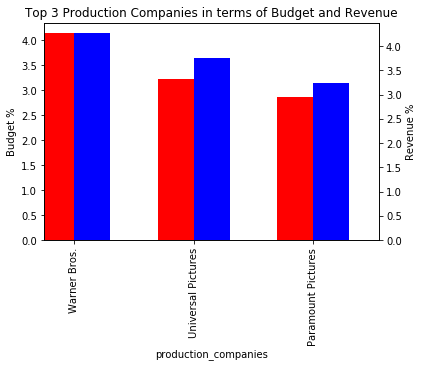

In [28]:
budg_rev = pd.concat([top_3_budget_comp, top_3_revenue_comp], axis=1)

budg_rev

fig = plt.figure() 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.3

budg_rev.budget.plot(kind='bar', color='red', ax=ax, width=width, position=1)
budg_rev.revenue.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Budget %');
ax2.set_ylabel('Revenue %');

ax.set_title('Top 3 Production Companies in terms of Budget and Revenue');

According to the above results, the top 3 revenue gainers as a whole are also **Warner Bros.**, **Universal Pictures** and **Paramount Pictures** in the same order. The revenue of these 3 companies comprise slightly over 11% of the revenue of 4448 companies.

Does this however insinuate higher profits and profit percentages?? In the next exercise, we will check if higher budget movies yield higher **profit** percentages.



### Research Question 3  - Do higher budgets yield higher <u>PROFITS</u>?

Lets begin by adding a profits column to our previous dataframe.

In [29]:
df_prod_comp['profit'] = df_prod_comp['revenue']-df_prod_comp['budget']

df_prod_comp.head()

,budget,revenue,original_title,director,keywords,runtime,vote_count,vote_average,release_year,production_companies,profit
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,5562,6.5,2015,Universal Studios,1.363529e+09
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,5562,6.5,2015,Amblin Entertainment,1.363529e+09
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,5562,6.5,2015,Legendary Pictures,1.363529e+09
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,5562,6.5,2015,Fuji Television Network,1.363529e+09
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,5562,6.5,2015,Dentsu,1.363529e+09


Now lets look at profit as a percentage of budget.

In [30]:
df_prod_comp['profit_perc'] = df_prod_comp['profit'] *100 / df_prod_comp['budget']

df_prod_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24255 entries, 0 to 10865
Data columns (total 12 columns):
budget                  13597 non-null float64
revenue                 12774 non-null float64
original_title          24255 non-null object
director                24208 non-null object
keywords                21517 non-null object
runtime                 24214 non-null float64
vote_count              24255 non-null int64
vote_average            24255 non-null float64
release_year            24255 non-null int64
production_companies    23225 non-null object
profit                  10630 non-null float64
profit_perc             10630 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 2.4+ MB


Now let us draw a relationship between the budget and profit percentage using a scatter plot.

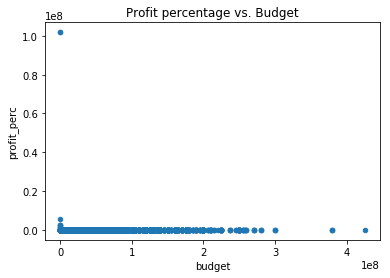

In [31]:
df_prod_comp.plot(x='budget', y = 'profit_perc', title = 'Profit percentage vs. Budget', kind='scatter');

Looking at above plot, it seems that profit percentage is excessively high at some points. Hence, let us examine these critical points in more detail.

We will check rows where profit percentage is higher than 10000.

In [32]:
df_prod_comp.query('profit_perc > 10000')

,budget,revenue,original_title,director,keywords,runtime,vote_count,vote_average,release_year,production_companies,profit,profit_perc
242,100000.0,42664410.0,The Gallows,Travis Cluff|Chris Lofing,gallows|high school|tragedy|hanging|found footage,87.0,247,5.0,2015,New Line Cinema,42564410.0,4.256441e+04
242,100000.0,42664410.0,The Gallows,Travis Cluff|Chris Lofing,gallows|high school|tragedy|hanging|found footage,87.0,247,5.0,2015,Blumhouse Productions,42564410.0,4.256441e+04
242,100000.0,42664410.0,The Gallows,Travis Cluff|Chris Lofing,gallows|high school|tragedy|hanging|found footage,87.0,247,5.0,2015,Management 360,42564410.0,4.256441e+04
242,100000.0,42664410.0,The Gallows,Travis Cluff|Chris Lofing,gallows|high school|tragedy|hanging|found footage,87.0,247,5.0,2015,Tremendum Pictures,42564410.0,4.256441e+04
1354,10000.0,7000000.0,Eraserhead,David Lynch,baby|mutant|claustrophobia|nightmare|parents-i...,89.0,194,7.1,1977,American Film Institute (AFI),6990000.0,6.990000e+04
1354,10000.0,7000000.0,Eraserhead,David Lynch,baby|mutant|claustrophobia|nightmare|parents-i...,89.0,194,7.1,1977,Libra Films,6990000.0,6.990000e+04
1372,230000.0,25000000.0,The Hills Have Eyes,Wes Craven,rape|mutation|government|murder|blood,89.0,57,6.0,1977,Blood Relations Co.,24770000.0,1.076957e+04
2207,30000.0,3045943.0,Catfish,Henry Joost|Ariel Schulman,aftercreditsstinger,87.0,125,6.4,2010,Hit the Ground Running Films,3015943.0,1.005314e+04
2449,25000.0,248000000.0,The Blair Witch Project,Daniel Myrick|Eduardo SÃ¡nchez,witch|voodoo|legend|sorcery|maryland,81.0,522,6.3,1999,Artisan Entertainment,247975000.0,9.919000e+05
2449,25000.0,248000000.0,The Blair Witch Project,Daniel Myrick|Eduardo SÃ¡nchez,witch|voodoo|legend|sorcery|maryland,81.0,522,6.3,1999,Haxan Films,247975000.0,9.919000e+05


Looking through the values, it is noticed that many movies are showing very low budgets < 500 which is also not reflecting the true values as per IMDB. Hence, it is best to filter out these values.

Let us try plotting again after applying the filter.

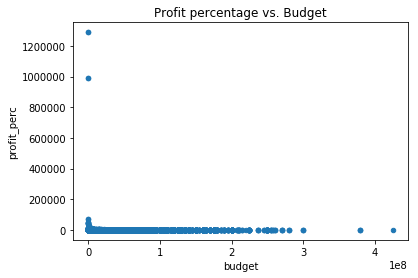

In [33]:
df_prod_comp = df_prod_comp.loc[(df[['budget']] > 500).all(axis=1)]

df_prod_comp.plot(x='budget', y = 'profit_perc', title = 'Profit percentage vs. Budget', kind='scatter');

Looking at the above graph after applying filters to unrealistic data, it seems that the profit percentage is highest where the budget is minimal.

Let us draw a relationship of the top production companies in terms of profit percentage now.

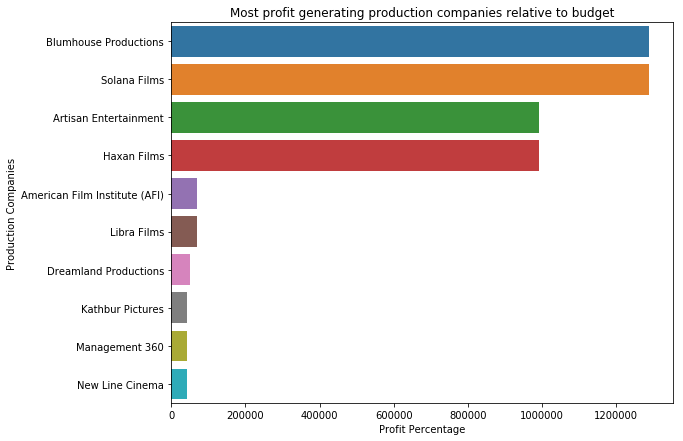

In [34]:
prof_perc = df_prod_comp.groupby(['production_companies']).max().profit_perc.nlargest(10)

prof_perc = pd.DataFrame({'production_companies': prof_perc.index, 'prof_perc': prof_perc.values})

prof_perc = prof_perc.sort_values(by='prof_perc', ascending=False)

f, ax = plt.subplots(figsize = (9, 7))
sns.barplot(x = 'prof_perc', y = 'production_companies', data = prof_perc)
ax.set_title('Most profit generating production companies relative to budget');
ax.set_xlabel('Profit Percentage');
ax.set_ylabel('Production Companies');

Looking at the top 10 profit generating production companies; we notice that none of them are similar to the top 3 from the previous exercise!

Hence, even though the top spending production companies made the largest revenues; that did not neccessarily mean they earned more for every dollar spent. Instead the top two profitable movies were **Paranormal Activity** and **The Blair Witch Project** which had budgets of *15000 USD* and *25000 USD* respectively. 

### Research Question 4  - Which genres have been the most popular over the years?

To begin this exercise, we will need to use the genre dataset which was previously split into twenty unique genres.

Next, we will need to calculate the genre percentage over the timeframe of the dataset using the following equation:

\begin{equation*}
genre\_perc = \frac{genre\_qty * 100 }{total\_genre}
\end{equation*}<br>

In [35]:
genre_qty = df_genres.groupby(['genres']).size()

total_genre = genre_qty.sum()

genre_perc = genre_qty * 100 / total_genre 

genre_perc

genres
Action              8.844370
Adventure           5.457244
Animation           2.593211
Comedy             14.071601
Crime               5.023187
Documentary         1.929141
Drama              17.659061
Family              4.566871
Fantasy             3.398256
Foreign             0.697459
History             1.239102
Horror              6.073085
Music               1.513634
Mystery             3.005008
Romance             6.351326
Science Fiction     4.559451
TV Movie            0.619551
Thriller           10.784641
War                 1.001669
Western             0.612131
dtype: float64

Now let us better visualize this data using a bar plot.

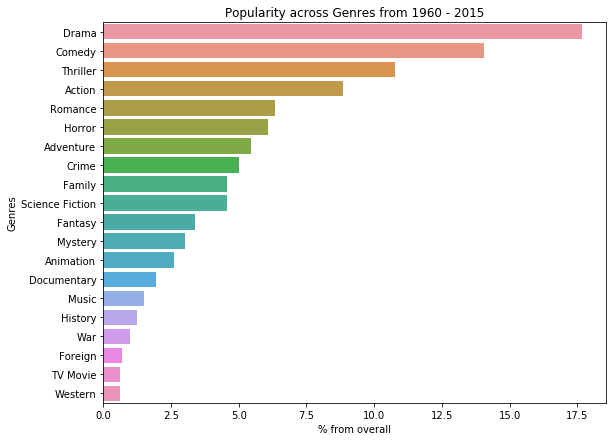

In [36]:
genre_perc = pd.DataFrame({'genres': genre_perc.index, 'genre_perc': genre_perc.values})

genre_perc = genre_perc.sort_values(by='genre_perc', ascending=False)

f, ax = plt.subplots(figsize = (9, 7))
sns.barplot(x = 'genre_perc', y = 'genres', data = genre_perc);
ax.set_title('Popularity across Genres from 1960 - 2015');
ax.set_xlabel('% from overall');
ax.set_ylabel('Genres');

According to the results above, Drama contemplates the largest % of the overall movie genres.

### Research Question 5  - How much has the movie industry grown over the years? Are the runtimes generally increasing or decreasing with time?

For the following exercise, we will draw two scatter plots showing the evolution of the movie industry over the past 55 years. Afterwards, we will examine how the runtimes have varied over the years.

<u>Movie count over time:</u>

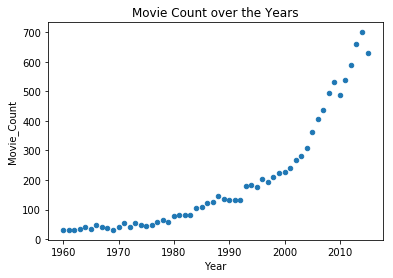

In [37]:
trend_year = df.groupby(['release_year']).size()

trend_year = pd.DataFrame({'Year': trend_year.index, 'Movie_Count': trend_year.values})

trend_year.plot(x='Year', y = 'Movie_Count', title = 'Movie Count over the Years', kind='scatter');

According to above, the movie industry has been growing exponentially over the past half a century with an immense growth starting from the 1990s.

<u>Movie runtime over time:</u>

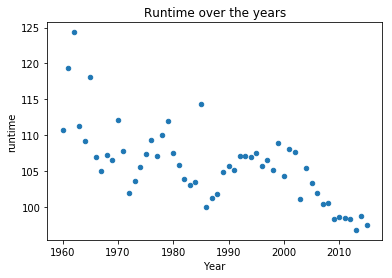

In [38]:
trend_year2 = df.groupby(['release_year']).mean().runtime

trend_year2

trend_year2 = pd.DataFrame({'Year': trend_year2.index, 'runtime': trend_year2.values})

trend_year2.plot(x='Year', y = 'runtime', title = 'Runtime over the years', kind='scatter');

According to the above plot, average movie runtimes are generally decreasing with time starting from the 120 minute average down to around 95 today.

<a id='conclusions'></a>
## Conclusions

In conclusion, the purpose of this project was to investigate The Movie Database (TMDB) in order to explore the relationship between certain parameters and the evolution of the movie industry over the years. The data accumulated was merely an estimation due to some missing links, for example several parameters were not displaying proper information and would infact be required for a more accurate result.

Using the neccessary functions and visualization tools, we were able to notice that the movies in the drama genre are the most popular in terms of quantity and vote count. Also, they usually yield higher voting averages through the popular vote count.

It was also noticed that the top 3 spending studios **Warner Bros.**, **Universal Pictures** and **Paramount Pictures** also returned the highest revenues percentage-wise. However, their profits in respect to the budget spent was not among the highest. Instead, it was noticed that low budget movies usually yield higher profits.

Finally, we can see that the movie industry is growing at an exponential rate where the number of movies per year has increased from about 30 per year to about 700 per year which was more than 20 fold. Also the average movie runtime has considerably decreased by 20% from around 120 minutes to 95 minutes today.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0